# 6.2 Nieoczywiste przykłady zastosowania drzew decyzyjnych.
Okazuje się, że drzewa decyzyjne i metody na nich bazujące są w stanie być użyte nie tylko do zwykłych danych tabelarycznych, ale także nadają się do rozpoznawania chociażby obrazów. Spróbujemy zatem stworzyć system, który będzie rozpoznawał obrazy, a dokładnie pisane odręcznie cyfry.

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
N_ROWS = 6
N_COLS= 10

In [6]:
indexes = np.random.randint(0, digits.images.shape[0], size=N_ROWS * N_COLS)

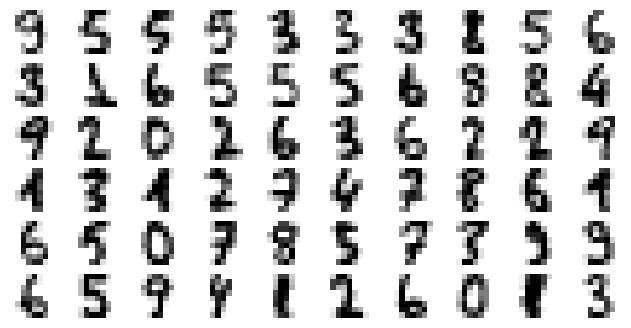

In [7]:
fig, ax = plt.subplots(nrows=N_ROWS, ncols=N_COLS,
                       figsize=(8, 4))
for index, cur_ax in zip(indexes, ax.flatten()):
    cur_ax.set_axis_off()
    cur_ax.imshow(digits.images[index],
                  cmap=plt.cm.gray_r,
                  interpolation="nearest")
plt.show()

W przypadku rozpoznawania obrazów problemem jest fakt, że nie możemy rozpatrywać każdej obserwacji osobno, a interesują nas również zależności pomiędzy poszczególnymi pikselami, które są w sąsiedztwie.

### Rozpoznawanie obrazów z użyciem Random Forest
Spróbujmy stworzyć system oparty o Random Forest, który będzie klasyfikował pisane odręcznie cyfry. Oczywiście przeprowadzimy proces walidacji krzyżowej, a jakość modelu zmierzymy za pomocą **accuracy**.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [9]:
param_grid = {
    "n_estimators": [5, 10, 25, 100, 1000],
    "criterion": ["gini", "entropy"],
    "max_depth": range(2, 10),
}

In [10]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [11]:
cv = GridSearchCV(RandomForestClassifier(random_state=735081), param_grid=param_grid, cv=5, verbose=True, scoring="accuracy", n_jobs=-1,
                  refit=True)
cv.fit(digits.data, digits.target)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=735081),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'n_estimators': [5, 10, 25, 100, 1000]},
             scoring='accuracy', verbose=True)

In [12]:
cv.best_score_

np.float64(0.9388022284122564)

Całkiem niezły wynik!

In [13]:
cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=1000,
                       random_state=735081)